## 读取数据

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle# 样本洗牌、打乱

D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorf

In [2]:
# 读取数据文件
df = pd.read_csv('data/boston.csv', header=0)

# 显示数据摘要描述信息
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [3]:
# 获取df的值
df = df.values

In [4]:
# 把df转换为np的数组格式
df = np.array(df)

In [5]:
# x_data为前12列特征数据
x_data = df[:,:12]
# y_data为最后一列标签数据
y_data = df[:,12] 

In [6]:
print(x_data.shape)

(506, 12)


In [7]:
print(y_data.shape)

(506,)


In [8]:
for i in range(12):
    df[:, i] = df[:, i] / (df[:,i].max()-df[:,i].min())
    
# x_data为归一化后的前12列特征数据
x_data = df[:,:12]

# y_data为最后一列标签数据
y_data = df[:,12]

## 构建模型

### 定义特征数据和标签数据的占位符

In [9]:
x = tf.placeholder(tf.float32, [None, 12], name='X') # 12个特征数据（12列）
y = tf.placeholder(tf.float32, [None, 1], name='Y') # 1个标签数据（1列）

### 定义模型函数


In [10]:
# 定义一个命名空间
with tf.name_scope('Model'):
    # w初始化值为shape=（12，1）的随机数
    w = tf.Variable(tf.random_normal([12,1], stddev=0.01), name='W')
    
    # b初始化值为1.0
    b = tf.Variable(1.0, name='b')
    
    # w和x是矩阵相乘，用matmul，不能用mutiply或者*
    def model(x,w,b):
        return tf.matmul(x,w) + b
    
    # 预测计算操作，前向计算节点
    pred = model(x,w,b)

## 模型训练

### 设置训练超参数

In [11]:
# 迭代轮次
train_epochs = 50

# 学习率
learning_rate = 0.01

In [12]:
# 定义损失函数
with tf.name_scope('LossFunction'):
    loss_function = tf.reduce_mean(tf.pow(y-pred, 2))# 均方误差

### 选择优化器
常用优化器包括：  
    tf.train.GradientDescentOptimizer  
    tf.train.AdadeltaOptimizer  
    tf.train.AdagradOptimizer  
    tf.train.AdagradDAOptimizer  
    tf.train.MomentumOptimizer  
    tf.train.AdamOptimizer  
    tf.train.FtrlOptimizer  
    tf.train.ProximalGradientDescentOptimizer  
    tf.train.ProximalAdagradOptimizer  
    tf.train.RMSPropOptimizer  


In [13]:
# 创建优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### 声明会话

In [14]:
sess = tf.Session()

# 定义初始化变量的操作
init = tf.global_variables_initializer()

## 加上TensorBoard可视化代码

### 为TensorBoard可视化准备数据

In [15]:
# 设置日志存储目录
logdir = 'log'

# 创建一个操作，用于记录损失值loss，
sum_loss_op = tf.summary.scalar('loss', loss_function)

# 把所有需要记录摘要日志文件的合并，方便一次性写入
merged = tf.summary.merge_all()

### 启动会话


In [16]:
sess.run(init)

### 创建摘要的文件写入器（FileWriter）

In [17]:
# 创建摘要writer，将计算图写入摘要文件
writer = tf.summary.FileWriter(logdir, sess.graph)

### 迭代训练

In [18]:
for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs, ys in zip(x_data, y_data):
        xs = xs.reshape(1, 12)# feed数据必须和placeholder的shape一致
        ys = ys.reshape(1, 1)
        
        _, summary_str, loss = sess.run([optimizer, sum_loss_op, loss_function], feed_dict={x: xs, y:ys})
        
        writer.add_summary(summary_str, epoch)
        loss_sum = loss_sum + loss
        
    # 打乱数据顺序
    xvalues, yvalues = shuffle(x_data, y_data)
    
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    loss_average = loss_sum/len(y_data)
    
    print('epoch=', epoch+1, 'loss=', loss_average, 'b=', b0temp, 'w=', w0temp)

epoch= 1 loss= 44.34032134481836 b= 3.6085346 w= [[-0.61259204]
 [ 1.3902448 ]
 [-0.7850646 ]
 [ 0.49746996]
 [ 2.5053036 ]
 [ 7.173929  ]
 [-0.05227968]
 [ 0.7894013 ]
 [ 0.38399696]
 [ 0.32518548]
 [ 2.3191383 ]
 [-4.38473   ]]
epoch= 2 loss= 32.04080764728858 b= 3.9966547 w= [[-1.1624128 ]
 [ 1.9704766 ]
 [-1.5137678 ]
 [ 0.85165507]
 [ 2.8811347 ]
 [10.61174   ]
 [-0.8189288 ]
 [ 0.3487018 ]
 [ 0.6325176 ]
 [-0.26558274]
 [ 1.1557745 ]
 [-8.101377  ]]
epoch= 3 loss= 27.3422998008073 b= 4.27774 w= [[ -1.6604762 ]
 [  2.185865  ]
 [ -1.9628466 ]
 [  1.0609044 ]
 [  3.1619873 ]
 [ 13.208442  ]
 [ -1.1952494 ]
 [ -0.18453252]
 [  0.9387489 ]
 [ -0.7664012 ]
 [  0.22394621]
 [-10.958046  ]]
epoch= 4 loss= 24.673271776151164 b= 4.4992485 w= [[ -2.1180053 ]
 [  2.2111092 ]
 [ -2.2390707 ]
 [  1.1553328 ]
 [  3.3457131 ]
 [ 15.198992  ]
 [ -1.3574435 ]
 [ -0.72861195]
 [  1.2625719 ]
 [ -1.1980449 ]
 [ -0.51011837]
 [-13.179678  ]]
epoch= 5 loss= 23.104619189499132 b= 4.6882334 w= [[ -2.54

epoch= 36 loss= 19.88665936601791 b= 9.927456 w= [[ -8.977288  ]
 [  1.706246  ]
 [ -1.3752286 ]
 [  0.12262717]
 [ -0.8279628 ]
 [ 22.872898  ]
 [ -0.7289458 ]
 [ -6.4597945 ]
 [  5.6653614 ]
 [ -5.2573028 ]
 [ -2.881493  ]
 [-20.698206  ]]
epoch= 37 loss= 19.86605421527078 b= 10.09313 w= [[ -9.0714    ]
 [  1.7181869 ]
 [ -1.3467896 ]
 [  0.11683479]
 [ -0.9299261 ]
 [ 22.877188  ]
 [ -0.7314964 ]
 [ -6.5310683 ]
 [  5.7095094 ]
 [ -5.3009787 ]
 [ -2.895768  ]
 [-20.666325  ]]
epoch= 38 loss= 19.846089618206822 b= 10.257825 w= [[ -9.161533  ]
 [  1.7295372 ]
 [ -1.319745  ]
 [  0.11148027]
 [ -1.0292087 ]
 [ 22.88052   ]
 [ -0.73430794]
 [ -6.6005216 ]
 [  5.7514267 ]
 [ -5.3432813 ]
 [ -2.9105036 ]
 [-20.635279  ]]
epoch= 39 loss= 19.82674170637508 b= 10.42152 w= [[ -9.247845  ]
 [  1.7403096 ]
 [ -1.2940397 ]
 [  0.10653067]
 [ -1.1259404 ]
 [ 22.88293   ]
 [ -0.73732686]
 [ -6.668228  ]
 [  5.7912574 ]
 [ -5.384286  ]
 [ -2.9256437 ]
 [-20.60509   ]]
epoch= 40 loss= 19.80798519696

## 训练结果异常原因

考虑不同特征取值范围大小的影响，不同特征权重不同对结果影响不同  

### 特征数据归一化（0~1）

In [19]:
for i in range(12):
    df[:, i] = df[:, i] / (df[:,i].max()-df[:,i].min())
    
# x_data为归一化后的前12列特征数据
x_data = df[:,:12]

# y_data为最后一列标签数据
y_data = df[:,12]

In [20]:
for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs, ys in zip(x_data, y_data):
        xs = xs.reshape(1, 12)# feed数据必须和placeholder的shape一致
        ys = ys.reshape(1, 1)
        
        _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs, y:ys})
        
        loss_sum = loss_sum + loss
        
    # 打乱数据顺序
    xvalues, yvalues = shuffle(x_data, y_data)
    
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    loss_average = loss_sum/len(y_data)
    
    print('epoch=', epoch+1, 'loss=', loss_average, 'b=', b0temp, 'w=', w0temp)

epoch= 1 loss= 19.634372576883468 b= 12.300623 w= [[-10.038087  ]
 [  1.8315408 ]
 [ -1.0716819 ]
 [  0.07032479]
 [ -2.1261008 ]
 [ 22.853964  ]
 [ -0.7779386 ]
 [ -7.3642898 ]
 [  6.1456857 ]
 [ -5.7938457 ]
 [ -3.1245327 ]
 [-20.314543  ]]
epoch= 2 loss= 19.621065853427726 b= 12.449763 w= [[-10.087177  ]
 [  1.8365766 ]
 [ -1.0589057 ]
 [  0.06871518]
 [ -2.1985886 ]
 [ 22.847578  ]
 [ -0.7810874 ]
 [ -7.4140215 ]
 [  6.167536  ]
 [ -5.8222985 ]
 [ -3.1416752 ]
 [-20.296011  ]]
epoch= 3 loss= 19.60810547829972 b= 12.597731 w= [[-10.134163  ]
 [  1.8413023 ]
 [ -1.0468179 ]
 [  0.06726205]
 [ -2.2697108 ]
 [ 22.840677  ]
 [ -0.7841469 ]
 [ -7.4626665 ]
 [  6.1885133 ]
 [ -5.8500223 ]
 [ -3.1588056 ]
 [-20.278273  ]]
epoch= 4 loss= 19.59548316081037 b= 12.744507 w= [[-10.179129  ]
 [  1.8457354 ]
 [ -1.0353887 ]
 [  0.06595299]
 [ -2.3395207 ]
 [ 22.833317  ]
 [ -0.7871167 ]
 [ -7.510267  ]
 [  6.2086773 ]
 [ -5.877046  ]
 [ -3.1759193 ]
 [-20.2613    ]]
epoch= 5 loss= 19.583166101393

epoch= 35 loss= 19.318048505566082 b= 16.7297 w= [[-10.921675  ]
 [  1.896594  ]
 [ -0.87351847]
 [  0.06406176]
 [ -4.039352  ]
 [ 22.467373  ]
 [ -0.83444136]
 [ -8.609055  ]
 [  6.595249  ]
 [ -6.4717283 ]
 [ -3.6644156 ]
 [-19.994026  ]]
epoch= 36 loss= 19.311677344685204 b= 16.841066 w= [[-10.932467  ]
 [  1.8966839 ]
 [ -0.87170094]
 [  0.06459977]
 [ -4.0832257 ]
 [ 22.453575  ]
 [ -0.83485687]
 [ -8.63577   ]
 [  6.6032724 ]
 [ -6.4855137 ]
 [ -3.6784005 ]
 [-19.990782  ]]
epoch= 37 loss= 19.305427211225496 b= 16.951435 w= [[-10.942784  ]
 [  1.8967235 ]
 [ -0.86998725]
 [  0.06515235]
 [ -4.126584  ]
 [ 22.43977   ]
 [ -0.83522785]
 [ -8.662089  ]
 [  6.611131  ]
 [ -6.4990773 ]
 [ -3.692274  ]
 [-19.98771   ]]
epoch= 38 loss= 19.29928465607493 b= 17.06082 w= [[-10.952642  ]
 [  1.8967197 ]
 [ -0.8683719 ]
 [  0.06571764]
 [ -4.1694374 ]
 [ 22.425941  ]
 [ -0.8355551 ]
 [ -8.688026  ]
 [  6.618844  ]
 [ -6.5124173 ]
 [ -3.7060294 ]
 [-19.984812  ]]
epoch= 39 loss= 19.293253026

深度学习中对于网络的训练时参数更新的过程，需要注意一种情况就是输入数据未作归一化时，如果前向传播结果已经是[0,0,0,1,0,0,0,0]这种形式，而真是结果是[1,0,0,0,0,0,0,0],此时由于得出的结论不具有概率性，而是错误的估计值,反向传播会使得权重和偏置值变得无穷大，导致数据溢出，也就出现了nan的问题。

## 模型应用

模型一般应该用来预测新的样本值，这里506条数据都用来训练，暂时没有新的数据

In [21]:
# 指定一条看训练效果
n = np.random.randint(506) # 随机指定
# n = 348
x_test = x_data[n]

x_test = x_test.reshape(1,12)
predict = sess.run(pred, feed_dict={x:x_test})
print('预测值：%f' % predict)

target = y_data[n]
print('标签值：%f' % target)

预测值：23.331917
标签值：23.700000


## 可视化训练过程中的损失值

In [22]:
loss_list = [] # 用于保存loss值的列表

for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs, ys in zip(x_data, y_data):
        xs = xs.reshape(1, 12)# feed数据必须和placeholder的shape一致
        ys = ys.reshape(1, 1)
        
        _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs, y:ys})
        
        loss_sum = loss_sum + loss
        
    # 打乱数据顺序
    xvalues, yvalues = shuffle(x_data, y_data)
    
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    loss_average = loss_sum/len(y_data)
    
    loss_list.append(loss_average)# 每轮添加一次
    
    print('epoch=', epoch+1, 'loss=', loss_average, 'b=', b0temp, 'w=', w0temp)

epoch= 1 loss= 19.228446585040643 b= 18.396547 w= [[-11.046717  ]
 [  1.8935478 ]
 [ -0.85425323]
 [  0.07384336]
 [ -4.684634  ]
 [ 22.247839  ]
 [ -0.8367161 ]
 [ -8.994456  ]
 [  6.707332  ]
 [ -6.668383  ]
 [ -3.8745427 ]
 [-19.960634  ]]
epoch= 2 loss= 19.223608525632823 b= 18.492939 w= [[-11.05184   ]
 [  1.8931277 ]
 [ -0.85356545]
 [  0.07450321]
 [ -4.721312  ]
 [ 22.234394  ]
 [ -0.8366169 ]
 [ -9.015914  ]
 [  6.7133803 ]
 [ -6.679212  ]
 [ -3.8867342 ]
 [-19.959574  ]]
epoch= 3 loss= 19.21885239970999 b= 18.588423 w= [[-11.056734  ]
 [  1.8926904 ]
 [ -0.85291815]
 [  0.07516409]
 [ -4.757601  ]
 [ 22.221016  ]
 [ -0.83649796]
 [ -9.037108  ]
 [  6.7193375 ]
 [ -6.6898875 ]
 [ -3.8988142 ]
 [-19.958616  ]]
epoch= 4 loss= 19.214174699620525 b= 18.683086 w= [[-11.061387  ]
 [  1.8922365 ]
 [ -0.85231215]
 [  0.07582786]
 [ -4.793506  ]
 [ 22.207682  ]
 [ -0.8363587 ]
 [ -9.058037  ]
 [  6.7251983 ]
 [ -6.700427  ]
 [ -3.9107926 ]
 [-19.957756  ]]
epoch= 5 loss= 19.20956882317

epoch= 35 loss= 19.09981088355309 b= 21.226332 w= [[-11.132399  ]
 [  1.8740511 ]
 [ -0.84487903]
 [  0.09570645]
 [ -5.744031  ]
 [ 21.832012  ]
 [ -0.82667166]
 [ -9.599742  ]
 [  6.8731747 ]
 [ -6.970877  ]
 [ -4.233745  ]
 [-19.956     ]]
epoch= 36 loss= 19.09692302106975 b= 21.296955 w= [[-11.133235  ]
 [  1.8734251 ]
 [ -0.84483635]
 [  0.09629837]
 [ -5.7701344 ]
 [ 21.821217  ]
 [ -0.82627785]
 [ -9.614353  ]
 [  6.8770957 ]
 [ -6.978133  ]
 [ -4.242738  ]
 [-19.956385  ]]
epoch= 37 loss= 19.094076988732454 b= 21.366917 w= [[-11.134026  ]
 [  1.8728011 ]
 [ -0.8447991 ]
 [  0.09688573]
 [ -5.795994  ]
 [ 21.810514  ]
 [ -0.8258835 ]
 [ -9.628813  ]
 [  6.8809724 ]
 [ -6.9853086 ]
 [ -4.2516456 ]
 [-19.95678   ]]
epoch= 38 loss= 19.09126664153647 b= 21.436247 w= [[-11.134764  ]
 [  1.87218   ]
 [ -0.8447684 ]
 [  0.09746978]
 [ -5.8216043 ]
 [ 21.79989   ]
 [ -0.8254884 ]
 [ -9.643133  ]
 [  6.884813  ]
 [ -6.9924154 ]
 [ -4.2604694 ]
 [-19.957193  ]]
epoch= 39 loss= 19.08850647

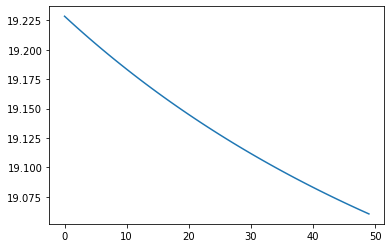

In [23]:
plt.plot(loss_list)

In [24]:
# 关闭session
sess.close()